# **Project Scenario**
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products.

By conducting exploratory data analysis EDA, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction.

## **data set**
data set  contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

### **Column descriptions**

**InvoiceNo** Invoice number of the transaction

**StockCode** Unique code of the product

**Description** Description of the product

**Quantity** Quantity of the product in the transaction

**InvoiceDate** Date and time of the transaction

**UnitPrice** Unit price of the product

**CustomerID** Unique identifier of the customer

**Country** Country where the transaction occurred



# Requirements
1. Load the dataset - display the first 7 rows
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such
as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
>>1. **Customer Distribution:**
Generate a histogram to showcase the distribution of the number of purchases made by each customer (CustomerID).
Label the x-axis with CustomerIDs and the y-axis with the corresponding counts.
Include appropriate title and axis labels.
>> 2. **Sales Over Time:**
Plot a line chart to depict the trend in total sales quantity over time.
Convert the 'InvoiceDate' column to a datetime format and use it as the x-axis.
Sum the 'Quantity' for each date to represent daily sales.
Add a title and label the x and y-axes accordingly.
>> 3. **Country-wise Sales**:
Create a bar chart to visualize the total sales quantity for each country.
Group the data by 'Country' and sum the 'Quantity' for each.
Label the x-axis with countries and provide a title and axis labels.
>> 4. **Product Price Distribution:**
Construct a histogram to display the distribution of product prices ('UnitPrice').
Use appropriate bins to capture the range of prices effectively.
Label the x-axis with price ranges and the y-axis with frequency.
Add a title and axis labels for clarity.
 >>5. **Top Selling Products:**
Identify and visualize the top N (e.g., 10) best-selling products based on total quantity sold.
Create a bar chart with the product descriptions on the x-axis and total quantity on the y-axis.
Label axes and provide a title.

5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms
of sales.
6. create a bar chart to visualize the total quantity of each product (StockCode) sold in the provided sample dataset? Additionally, label the x-axis with the StockCodes and provide a meaningful title and axis labels for clarity in interpretation.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the
analysis.
8. write conclusions and summarize your findings from the exploratory data analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Load the dataset - display the first 7 rows



In [2]:
#import dataset
df = pd.read_excel('/content/drive/MyDrive/EDA/Online_Retail.xlsx')
df.head(7)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom


### 2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


CustomerID data column must be changed into object data type.



In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.duplicated().sum()

5268

Dataset contins

*   1454 NULL values in 'Description' column
*   135080 Null values in 'CustomerID' column
*   5268 duplicated rows

All these rows must be dropped.





In [7]:
#dropping duplicates and nulls and also resseting index.
df = df.drop_duplicates().dropna().reset_index(drop=True)

In [8]:
#converting 'CustomerID' to int first to delete ".0" from it
df["CustomerID"] = df["CustomerID"].astype('int').astype('object')
df["Total Price"] = df["UnitPrice"] * df["Quantity"]

In [9]:
df.describe()

,Quantity,UnitPrice,Total Price
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,20.613638
std,250.283037,69.764035,430.352218
min,-80995.000000,0.000000,-168469.600000
25%,2.000000,1.250000,4.250000
50%,5.000000,1.950000,11.700000
75%,12.000000,3.750000,19.800000
max,80995.000000,38970.000000,168469.600000


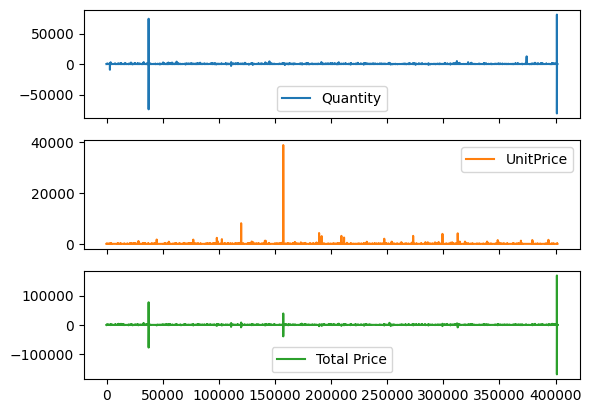

In [10]:
df[["Quantity","UnitPrice","Total Price"]].plot(subplots=True);

1.   Data contains values below 0 that make no sence, since quantity and price can not be less than zero.
2.   There are some extreme values that should be dropped.




In [13]:
df = df[(df.UnitPrice < df.UnitPrice.quantile(0.99)) & (df.UnitPrice >= 0.01) & (df.Quantity < df.Quantity.quantile(0.99)) & (df.Quantity > 0)].reset_index(drop=True)

Dropped all data above the 99th quantile and below zero of both unitprice and quantity columns.

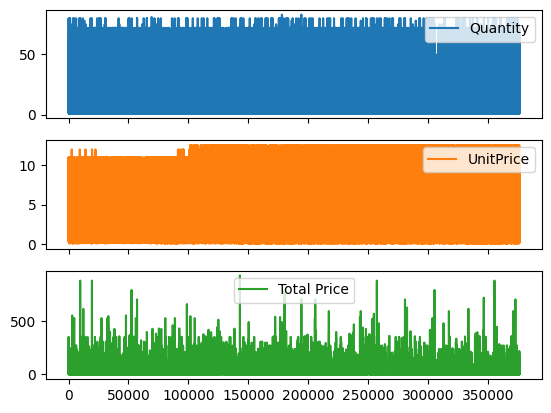

In [15]:
df[["Quantity","UnitPrice","Total Price"]].plot(subplots=True);

Data looks more realistic after cleaning.

### 3.Explore the basic statistics of the dataset. (description)

#### 1.Customer Distribution

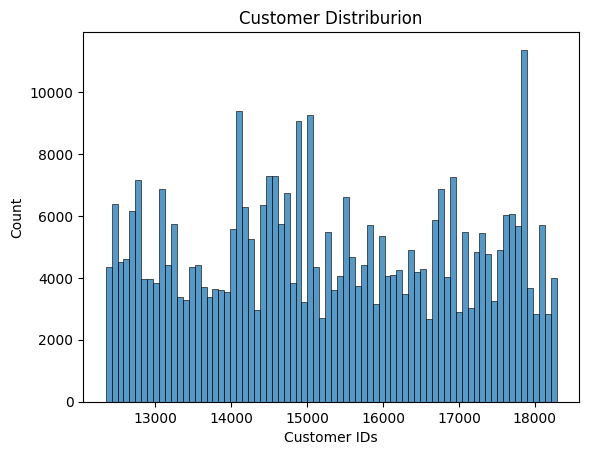

In [16]:
ax = sns.histplot(data=df, x="CustomerID")
ax.set_xlabel('Customer IDs')
ax.set_title("Customer Distriburion");

#### 2.Sales Over Time

In [17]:
df['day'] = df.InvoiceDate.dt.date
x = df.groupby("day").sum()["Quantity"]

<ipython-input-17-8ad6ebe84c0f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = df.groupby("day").sum()["Quantity"]


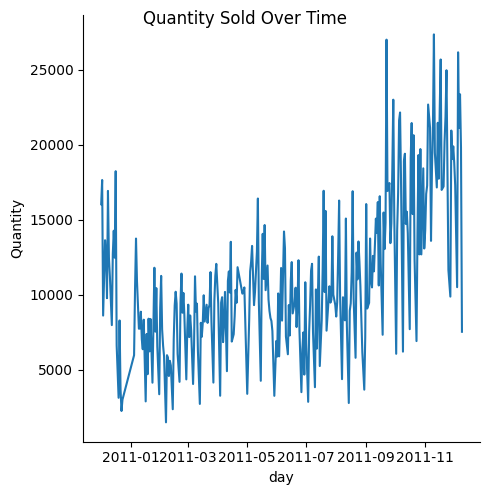

In [18]:
sot = sns.relplot(data=x, kind="line")
sot.fig.suptitle("Quantity Sold Over Time");

#### 3.Country-wise Sales

In [19]:
 y = df.groupby("Country").sum()["Quantity"].sort_values(ascending=True).reset_index()

<ipython-input-19-dcb3a2f7003d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = df.groupby("Country").sum()["Quantity"].sort_values(ascending=True).reset_index()


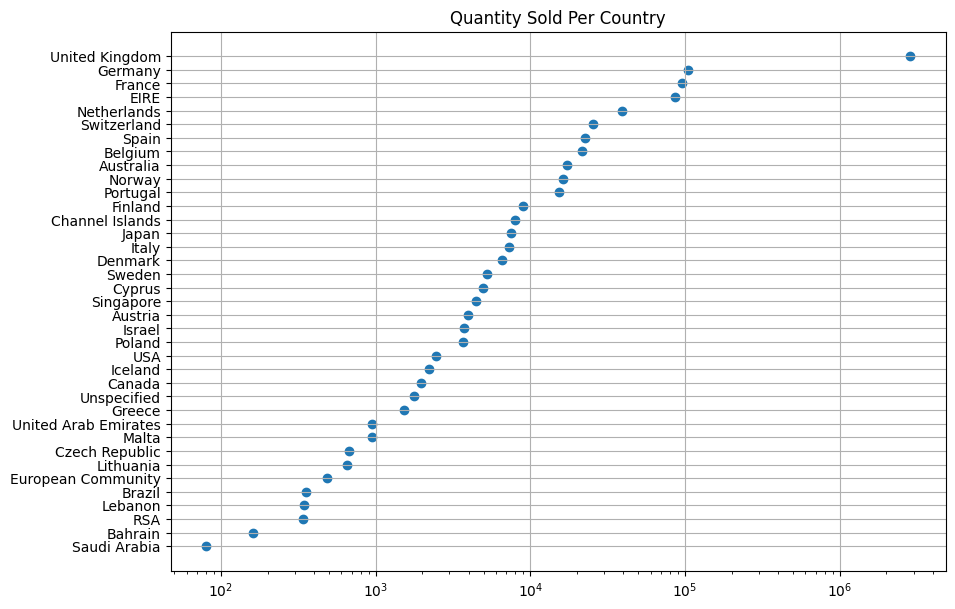

In [21]:
ax = plt.subplots(figsize=(10, 7))
plt.scatter(data=y.reset_index(), y="Country", x='Quantity')
plt.xscale('log')
plt.grid()
plt.title("Quantity Sold Per Country");

#### 4.Product Price Distribution

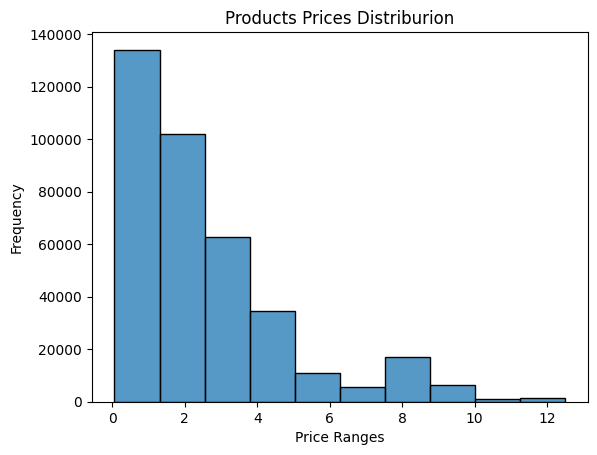

In [22]:
ppd = sns.histplot(data=df, x="UnitPrice", bins= 10)
ppd.set_xlabel('Price Ranges')
ppd.set_ylabel('Frequency')
ppd.set_title("Products Prices Distriburion");

#### 5.Top Selling Products

In [23]:
 top_selling = df.groupby("Description").sum()["Quantity"].sort_values(ascending=False).reset_index()[:10]
 top_selling

<ipython-input-23-b5ebd6763a73>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_selling = df.groupby("Description").sum()["Quantity"].sort_values(ascending=False).reset_index()[:10]


,Description,Quantity
0,WHITE HANGING HEART T-LIGHT HOLDER,22146
1,ASSORTED COLOUR BIRD ORNAMENT,21223
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,17023
3,PACK OF 72 RETROSPOT CAKE CASES,16630
4,JUMBO BAG RED RETROSPOT,15458
5,LUNCH BAG RED RETROSPOT,11846
6,PARTY BUNTING,11633
7,RABBIT NIGHT LIGHT,11493
8,PAPER CHAIN KIT 50'S CHRISTMAS,11299
9,MINI PAINT SET VINTAGE,11182


Text(0, 0.5, 'Quantity Sold')

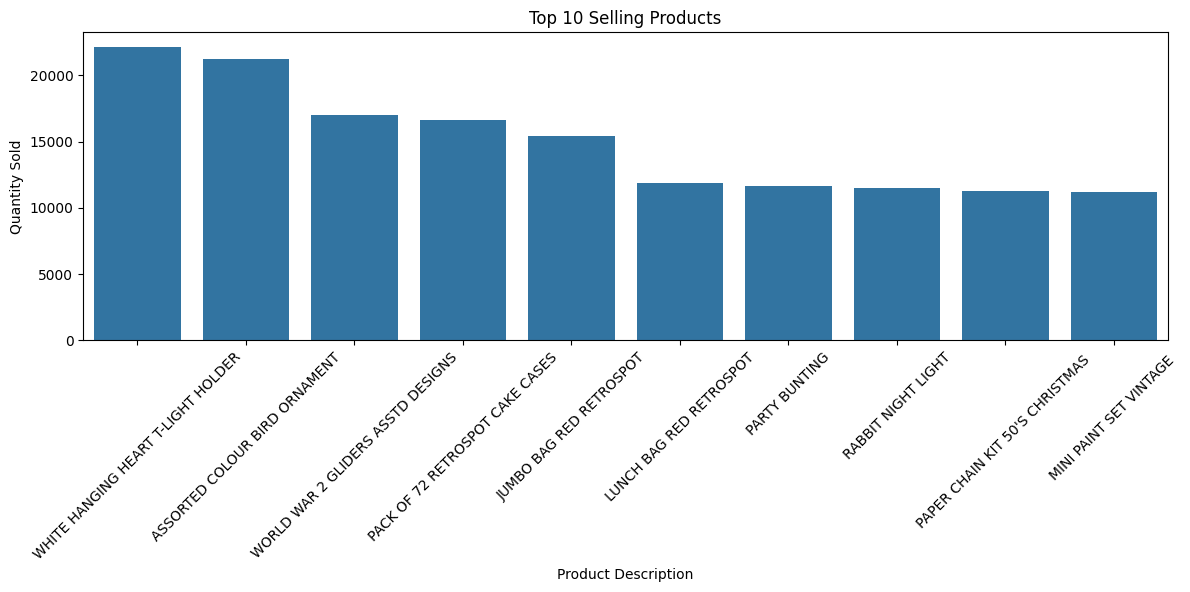

In [29]:
ax = plt.subplots(figsize=(14, 4))
sns.barplot(data = top_selling, x = "Description", y = "Quantity")
plt.xticks(rotation=45);
plt.title("Top 10 Selling Products")
plt.xlabel("Product Description")
plt.ylabel("Quantity Sold")

#### 6.Sales trends over time


In [64]:
df['DayOfWeek'] = df["InvoiceDate"].dt.day_name()
sales_days = df.groupby('DayOfWeek').sum().reset_index()[['DayOfWeek', 'Total Price']].sort_values(by='Total Price')
new_order_day = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
sales_days['DayOfWeek'] = pd.Categorical(sales_days['DayOfWeek'], categories=new_order_day, ordered=True)

<ipython-input-64-e86210f1415c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_days = df.groupby('DayOfWeek').sum().reset_index()[['DayOfWeek', 'Total Price']].sort_values(by='Total Price')


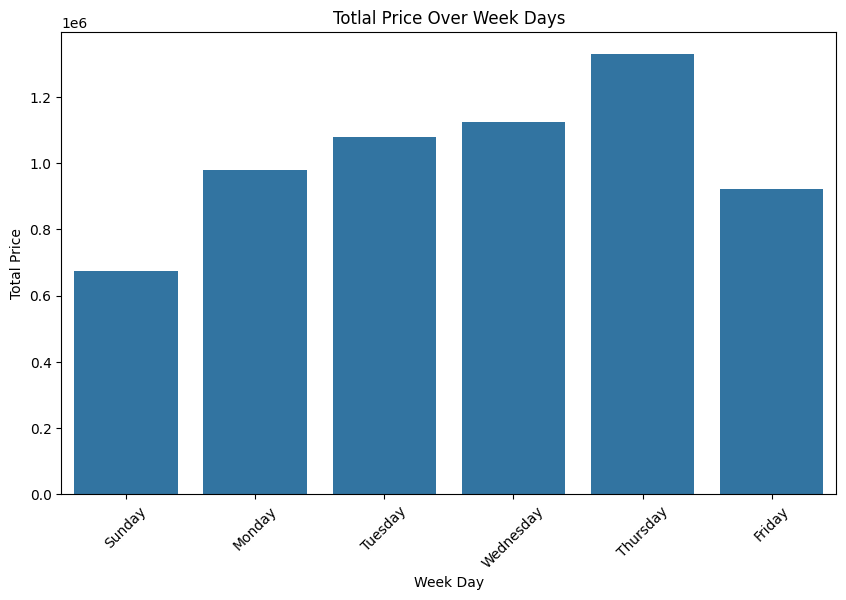

In [65]:
ax = plt.subplots(figsize=(10, 6))
sns.barplot(data = sales_days, x = "DayOfWeek", y = "Total Price")
plt.xticks(rotation=45);
plt.title("Totlal Price Over Week Days")
plt.xlabel("Week Day")
plt.ylabel("Total Price");

In [61]:
df['DayOfMonth'] = df["InvoiceDate"].dt.month_name()
sales_months = df.groupby('DayOfMonth').sum().reset_index()[['DayOfMonth', 'Total Price']].sort_values(by='Total Price')
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sales_months['DayOfMonth'] = pd.Categorical(sales_months['DayOfMonth'], categories=new_order, ordered=True)

<ipython-input-61-c1827513ff8c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_months = df.groupby('DayOfMonth').sum().reset_index()[['DayOfMonth', 'Total Price']].sort_values(by='Total Price')


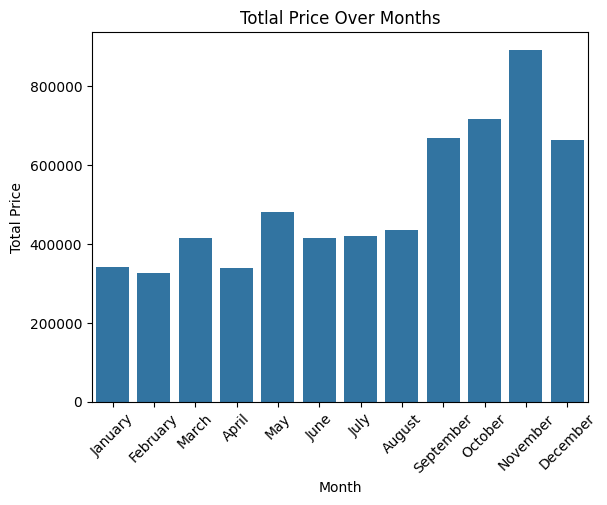

In [63]:
sns.barplot(data = sales_months, x = "DayOfMonth", y = "Total Price")
plt.xticks(rotation=45);
plt.title("Totlal Price Over Months")
plt.xlabel("Month")
plt.ylabel("Total Price");

#### 7.Products Quantity Sales over time


In [77]:
stock_qunat = df.groupby('StockCode').sum().reset_index()[['StockCode', 'Quantity']].sort_values(by="Quantity", ascending=False)[:50]

<ipython-input-77-98b6270f3a5e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stock_qunat = df.groupby('StockCode').sum().reset_index()[['StockCode', 'Quantity']].sort_values(by="Quantity", ascending=False)[:50]


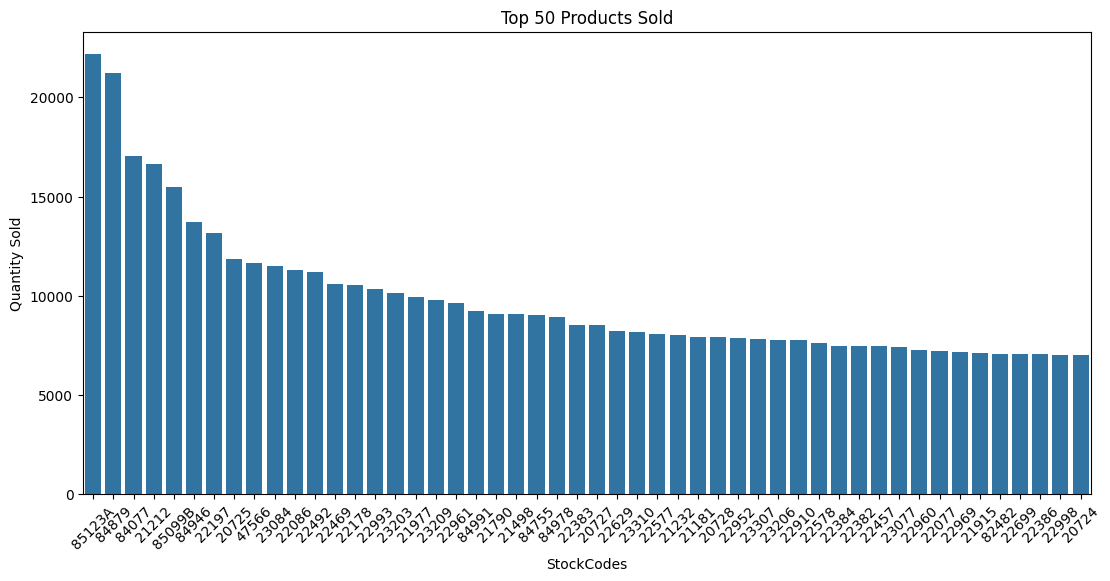

In [83]:
ax = plt.subplots(figsize=(13, 6))
sns.barplot(data = stock_qunat, x = "StockCode", y = "Quantity")
plt.xticks(rotation=45);
plt.title("Top 50 Products Sold")
plt.xlabel("StockCodes")
plt.ylabel("Quantity Sold");

# conclusion


1.   Most sales are in United Kingdom.
2.   Most of the products are priced below 4 dollars.
3.   Top selling product is "White Hanging Heart T-Light Holder"
4.   Thursday is the busiest day
5.   November is the busiest month because of the black Friday
6.   85123A is the stock code of our most selling product

